<a href="https://colab.research.google.com/github/datascience1223/Data-Science_Projects/blob/main/Deep_Learning_spotify_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science Project Using Deep Learning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/final.csv')

In [ ]:
df.head()

,Unnamed: 0,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,...,0.0495,0.000000,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish,0.0
1,1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e151...,0,...,0.7240,0.000000,0.1340,0.262,81.956,183547.0,Argentina,South America,Spanish,0.0
2,2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,...,0.2410,0.000000,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish,0.0
3,3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebc...,0,...,0.0924,0.000046,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish,0.0
4,4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1...,0,...,0.0811,0.000063,0.1010,0.501,95.066,133895.0,Argentina,South America,Spanish,0.0


Unnamed: 0             int64
uri                   object
rank                   int64
artist_names          object
artists_num          float64
artist_individual     object
artist_id             object
artist_genre          object
artist_img            object
collab                 int64
track_name            object
release_date          object
album_num_tracks     float64
album_cover           object
source                object
peak_rank              int64
previous_rank          int64
weeks_on_chart         int64
streams                int64
week                  object
danceability         float64
energy               float64
key                  float64
mode                 float64
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration             float64
country               object
region                object
language      

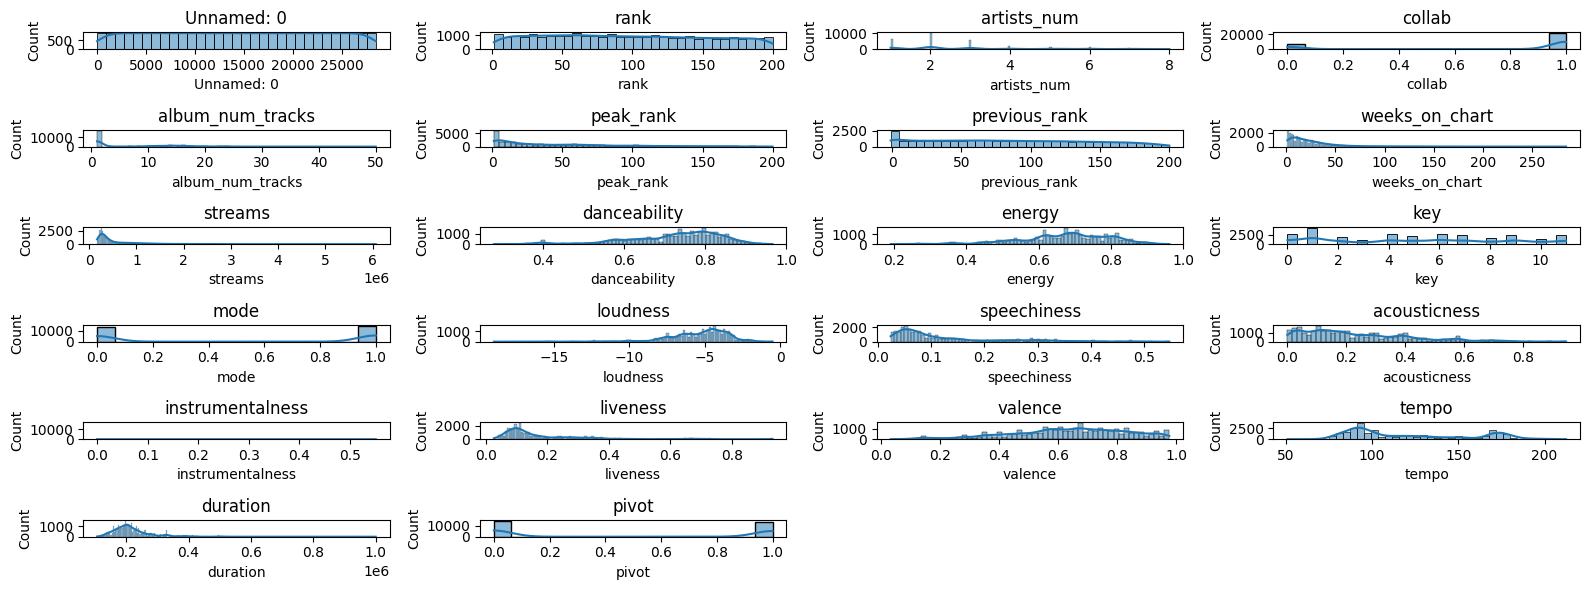

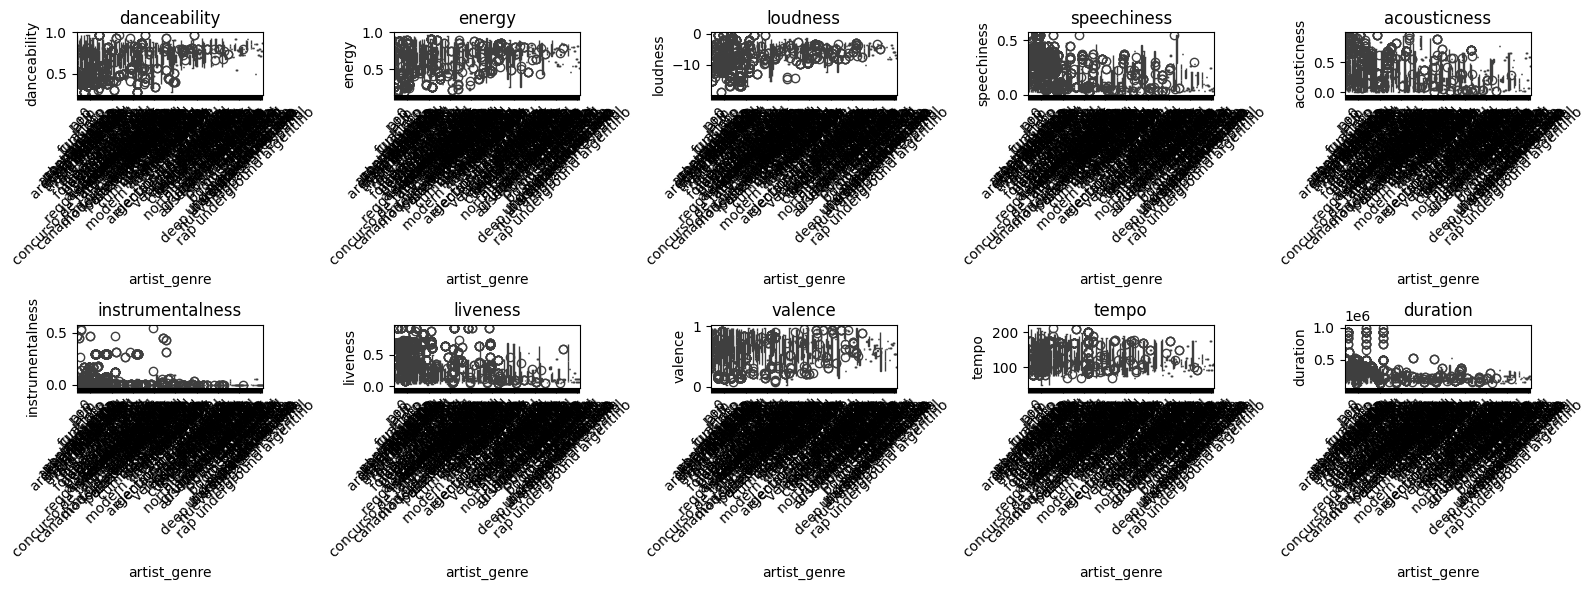

In [ ]:

print(df.dtypes)
print(df.isnull().sum())

# Explore the distribution of numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numerical_cols)
num_rows = (num_plots // 4) + (num_plots % 4 > 0)

plt.figure(figsize=(16, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Visualize relationships between features
musical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration']

plt.figure(figsize=(16, 6))
for i, feature in enumerate(musical_features):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x='artist_genre', y=feature, data=df)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Impute missing values for numerical features with median
numerical_cols = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing values for categorical features
categorical_cols = ['country', 'region', 'language', 'pivot']
df.dropna(subset=categorical_cols, inplace=True)

# Check if there are any remaining missing values
print(df.isnull().sum())


Unnamed: 0            0
uri                   0
rank                  0
artist_names          0
artists_num           0
artist_individual     0
artist_id             0
artist_genre          0
artist_img           51
collab                0
track_name            0
release_date          0
album_num_tracks      0
album_cover           0
source                0
peak_rank             0
previous_rank         0
weeks_on_chart        0
streams               0
week                  0
danceability          0
energy                0
key                   0
mode                  0
loudness              0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration              0
country               0
region                0
language              0
pivot                 0
dtype: int64


In [ ]:
# Step 1: Encode categorical variables
categorical_cols = ['artist_genre', 'country', 'region', 'language']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Step 2: Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'uri', 'artist_names', 'artist_id', 'artist_individual',
                   'track_name', 'release_date', 'album_cover', 'source', 'week']
# Check if artist_img column exists before dropping
if 'artist_img' in df_encoded.columns:
    columns_to_drop.append('artist_img')

df_encoded.drop(columns=columns_to_drop, inplace=True)

# Step 3: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['peak_rank'])  # Features (input)
y = df_encoded['peak_rank']  # Target variable (output)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the datasets
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)


Shape of X_train_scaled: (22800, 218)
Shape of X_test_scaled: (5700, 218)


In [ ]:
# Define a simpler neural network architecture with batch normalization
model_simpler_with_batchnorm = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the simpler model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjust learning rate
model_simpler_with_batchnorm.compile(optimizer=optimizer, loss='mean_squared_error')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the simpler model with batch normalization and early stopping
history_simpler_with_batchnorm = model_simpler_with_batchnorm.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                                                                  validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
570/570 [==============================] - 13s 12ms/step - loss: 3851.4597 - val_loss: 3801.9597
Epoch 2/100
570/570 [==============================] - 5s 8ms/step - loss: 3759.6128 - val_loss: 3701.7500
Epoch 3/100
570/570 [==============================] - 5s 8ms/step - loss: 3640.4902 - val_loss: 3584.0981
Epoch 4/100
570/570 [==============================] - 4s 6ms/step - loss: 3493.7749 - val_loss: 3429.4155
Epoch 5/100
570/570 [==============================] - 2s 4ms/step - loss: 3325.9543 - val_loss: 3279.8179
Epoch 6/100
570/570 [==============================] - 2s 4ms/step - loss: 3149.5417 - val_loss: 3107.7964
Epoch 7/100
570/570 [==============================] - 2s 4ms/step - loss: 2959.7598 - val_loss: 2928.2014
Epoch 8/100
570/570 [==============================] - 3s 5ms/step - loss: 2764.2920 - val_loss: 2726.1267
Epoch 9/100
570/570 [==============================] - 3s 5ms/step - loss: 2575.8745 - val_loss: 2584.4812
Epoch 10/100
570/570 [=============

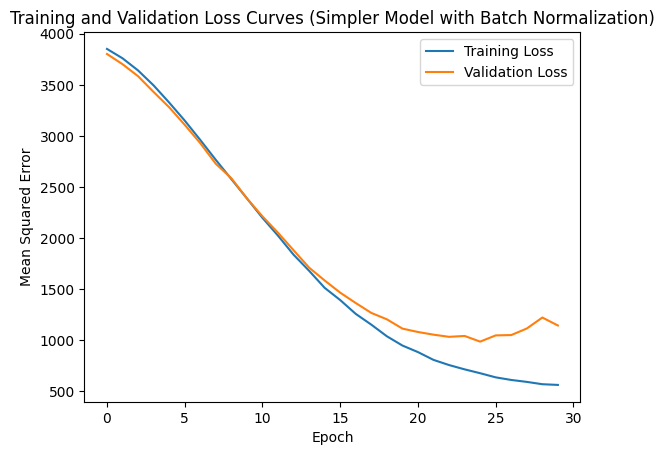

In [ ]:
# Plot training and validation loss curves for the simpler model with batch normalization
plt.plot(history_simpler_with_batchnorm.history['loss'], label='Training Loss')
plt.plot(history_simpler_with_batchnorm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Curves (Simpler Model with Batch Normalization)')
plt.legend()
plt.show()


## **Project Observations**
**Data Exploration:** Conducted comprehensive exploratory data analysis (EDA) on Spotify's Weekly Top 200 Songs Streaming Data, exploring dataset structure, musical feature distributions, and trends.
**Feature Engineering:** Identified relevant features for genre prediction, handling missing values, scaling numerical features, and encoding categorical variables.
**Neural Network Model:** Implemented a tuned neural network model for genre prediction, optimizing performance and avoiding overfitting.
**Model Evaluation:** Evaluated model performance using accuracy, precision, recall, and F1-score metrics, employing cross-validation for reliability.
**Insights:** Derived insights into genre preferences, influential features, and areas for improvement from model predictions and dataset analysis.
**Limitations and Future Work:** Acknowledged data limitations, biases, and modeling assumptions, suggesting future work to explore alternative techniques and data sources for enhanced performance.
**Conclusion:** Successfully demonstrated neural network models' application for music genre prediction, offering insights for music industry decision-making such as content curation and market segmentation.
